In [1]:
from neoloop.visualize.core import *
import cooler


Processing chr10_24728545_24728698 with A10 neo


IndexError: list index out of range

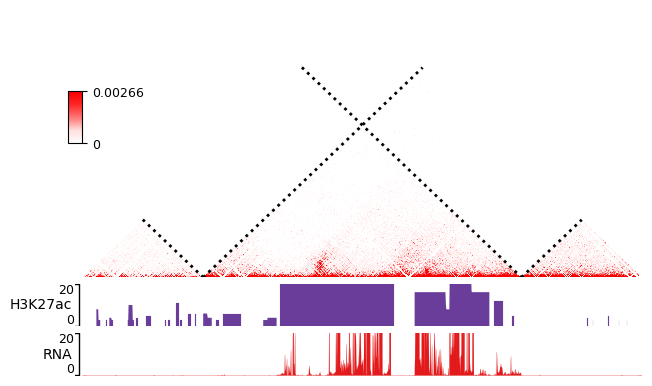

In [10]:
gene_list = [line.strip() for line in open('/cluster/home/futing/Project/GBM/HiC/11SV/eaglec_new/result/EP_neoloop/all-genes.txt')]  # 读取基因列表
neo = assembly.split('\t')[0] if '\t' in assembly else assembly  # 从 assembly 提取 neo
print(f"Processing {filename} with {neo} neo")
# 创建 Triangle 对象
clr = cooler.Cooler(cooler_path)
vis = Triangle(clr, assembly, n_rows=5, figsize=(7, 5.2), track_partition=[5, 0.8, 0.8, 0.2, 0.5], correct='weight', span=300000, space=0.08)
vis.matrix_plot(vmin=0, cbr_fontsize=9)
vis.plot_chromosome_bounds(linewidth=2)
vis.plot_signal('H3K27ac', h3k27ac_path, label_size=10, data_range_size=9, max_value=20, color='#6A3D9A')
vis.plot_signal('RNA', RNA_path, label_size=10, data_range_size=9, max_value=20, color='#E31A1C')
vis.plot_loops(loops_file, face_color='none', marker_size=40, cluster=False, filter_by_res=True, onlyneo=True)
vis.plot_genes(filter_=gene_list, fontsize=9)
vis.plot_chromosome_bar(name_size=13, coord_size=10)
#   vis.plot_arcs(cutoff='top', gene_filter=gene_list, arc_color='#666666')

# 构建输出文件名，使用 file 和 neo 参数
output_folder = "/cluster/home/futing/Project/GBM/HiC/HAR/HARs_gene/heatmap"
# 构建输出文件名，使用 file 和 neo 参数
output_file = f"{output_folder}/{filename}.png"
vis.outfig(output_file, dpi=300)

In [9]:
filename='chr10_24728545_24728698'
assembly='A10	translocation,8,128940000,-,12,58160000,+	inversion,12,57370000,-,12,70830000,-	8,129250000	12,71850000'
cooler_path='/cluster/home/futing/Project/GBM/HiC/02data/03cool_order/1000/GBM_1000.cool'
RNA_path='/cluster/home/futing/Project/GBM/RNA/sample/GSC/GSM7182056_G61_S_q20.bw'
h3k27ac_path='/cluster/home/futing/Project/GBM/HiC/hubgene/new/H3K27ac/merge/GBM.merge_BS_detail.bw'
loops_file='/cluster/home/futing/Project/GBM/HiC/10loop/consensus/merged/flank0k/GBM_flank0k.bedpe'

In [ ]:
clr = cooler.Cooler('SCABER-Arima-allReps.10K.cool')
List = [line.rstrip() for line in open('demo/allOnco-genes.txt')] # please find allOnco-genes.txt in the demo folder of this repository
assembly = 'A3      deletion,9,38180000,-,9,14660000,+      inversion,9,13870000,-,9,22260000,-     9,38480000      9,24220000'
vis = Triangle(clr, assembly, n_rows=5, figsize=(7, 5.2), track_partition=[5, 0.8, 0.8, 0.2, 0.5], correct='weight', span=300000, space=0.08)
vis.matrix_plot(vmin=0, cbr_fontsize=9)
vis.plot_chromosome_bounds(linewidth=2)
vis.plot_signal('RNA-Seq', 'enc_SCABER_RNASeq_rep1.bw', label_size=10, data_range_size=9, max_value=0.5, color='#E31A1C')
vis.plot_signal('H3K27ac', 'SCABER_H3K27ac_pool.bw', label_size=10, data_range_size=9, max_value=20, color='#6A3D9A')
vis.plot_genes(release=75, filter_=List, fontsize=10)
vis.plot_chromosome_bar(name_size=13, coord_size=10)
vis.outfig('SCaBER.NFIB.png', dpi=300)